

# Project: Investigate a Dataset - [TMDb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

id                      
imdb_id                 
popularity              
budget                  
revenue                 
original_title          
cast                   
homepage                
director                
tagline                 
keywords                
overview                
runtime                 
genres                 
production_companies    
release_date            
vote_count              
vote_average           
release_year            
budget_adj             
revenue_adj     

Total rows are = 10866     
Total columns are = 21

### Question(s) for Analysis
1-which Movie had highest budget?              
2-Which Genre Has The Highest Release Of Movies?                        
3-What year had the highest release of movies?                      
4-How Does popularity affect profit?                         
5-Which Movies according to their length was liked by audience according to popularity?




In [2]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
df = pd.read_csv('tmdb-movies.csv') #reading file

In [4]:
df.head() #to view rows and columns

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape #to know number of rows and columns

(10866, 21)

In [6]:
df.info() #know dattypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe() #getting descriptive statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


 

Right here we are going to clean the dataset,    
firstly by dropping nan values,      
then dropping duplicates,      
then removing unwanted coloumns      
then converting release_date to datetime from string     

In [8]:
df.shape #knowing number of rows and coloumns

(10866, 21)

In [9]:
df.info() #know datatypes of each set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
df.isnull().sum() #calculate number of nan values


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.dropna(inplace=True) #dropping nan values

In [12]:
df.isnull().sum() #checking

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
df.drop(['imdb_id','tagline','overview','cast','homepage','director','keywords'], axis=1, inplace=True) #dropping unwanted coloumns

In [14]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.drop_duplicates(inplace=True) #dropping duplicates

In [16]:
df.duplicated().sum() #checking if there any duplicates

0

In [17]:
df['release_date']= pd.to_datetime(df['release_date']) #converting release date to datetime

In [43]:
df.head(5) #checking that release date has changed to date time

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How Does Budget affect Profit?)

Correlation Between Budget And Profit :  0.61441524289


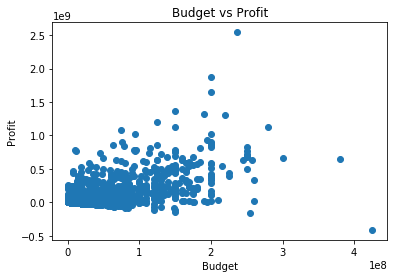

In [60]:
#calculate the profit by subtracting budget from revenue
df['Profit'] = df['revenue'] - df['budget']
df_budg = plt.scatter(df['budget'], df['Profit'], alpha =1) #plotting popularity and profit
plt.title('Budget vs Profit') #title
plt.xlabel('Budget') #x label
plt.ylabel('Profit') #y label
#finding corr between budget and profit
budg_corr = df.corr()
print("Correlation Between Budget And Profit : ",budg_corr.loc['budget','Profit'])


As we can see from the above plot that budget and profit has a positive correlation of (0.61) which means that movies with higher budget tend to have more profit

### Research Question 2 (Which Genre Has The Highest Release Of Movies?)

In [61]:
# i inserted a function that helps in splitting the string and return count of each genre

def genr(x):
    genr_plot = df[x].str.cat(sep = '|') #remove dashes from all rows of genre
    genr = pd.Series(genr_plot.split('|'))
    count = genr.value_counts(ascending=True) #count values of genres and return
    return count


In [62]:
genre_movies = genr('genres')
print(genre_movies)

Foreign              6
TV Movie            16
Western             20
War                 44
History             56
Music               72
Documentary         93
Mystery            148
Animation          170
Fantasy            202
Family             233
Crime              262
Horror             273
Romance            291
Science Fiction    291
Adventure          361
Action             532
Thriller           575
Comedy             640
Drama              838
dtype: int64


Text(0,0.5,'Number Of Movies')

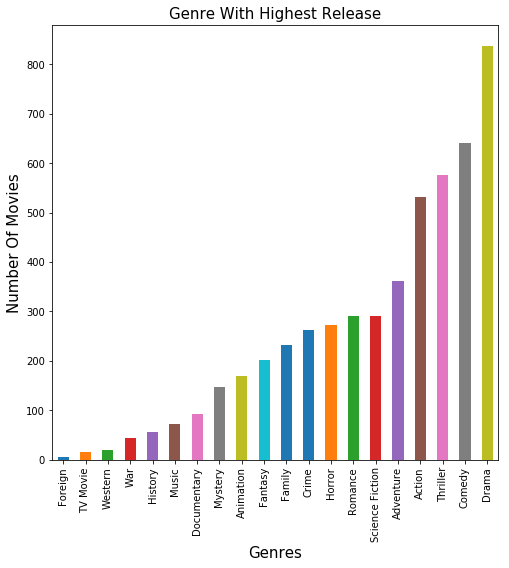

In [63]:
#plotting a bar for genre vs number of movies
genre_movies.plot(kind= 'bar',figsize = (8,8))
plt.title("Genre With Highest Release",fontsize=15) #naming the title
plt.xlabel('Genres',fontsize=15) #naming x-axis
plt.ylabel("Number Of Movies",fontsize= 15) #naming y-axis


As we can see at the bar chart above, drama had the highest number of movies

### Research Question 3  (Which Year Has Highest Release Of Movies?)

In [22]:
RY=df.groupby('release_year').count()['id'] #counting number of movies each year

(2011, 1961)

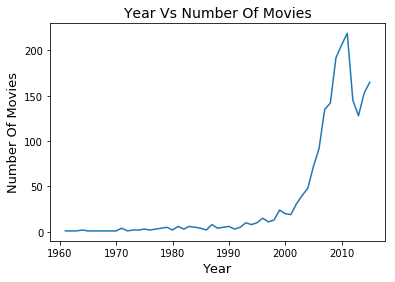

In [65]:
RY.plot(xticks = np.arange(1960,2016,10))#plotting years and number of movies
plt.title("Year Vs Number Of Movies",fontsize = 14)#naming title
plt.xlabel('Year',fontsize = 13)#labeling x
plt.ylabel('Number Of Movies',fontsize = 13)#labelling y
RY.idxmax(),RY.idxmin() #know highest year and lowest year



As we can see in the above graph that 2011 had the highest number of movies and  1961 had the lowest number of movies

### Research Question 4 (How Does popularity affect profit?)

Correlation Between Popularity And Profit :  0.621362182121


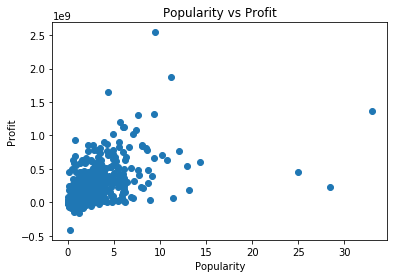

In [24]:
#calculate the profit by subtracting budget from revenue
df['Profit'] = df['revenue'] - df['budget']
df_pop = plt.scatter(df['popularity'], df['Profit'], alpha =1) #plotting popularity and profit
plt.title('Popularity vs Profit') #title
plt.xlabel('Popularity') #x label
plt.ylabel('Profit') #y label
#now i will get the correlation betweern popularity and profit
pop_corr = df.corr()

print("Correlation Between Popularity And Profit : ",pop_corr.loc['popularity','Profit'])

As we see in the above plot, popularity and profit had a  positive correlation of (0.61). it means that the movie with higher popularity tends to have more profit

### Research Question 5 (5-Which Movies according to their length was liked by audience according to popularity?)


Text(0,0.5,'Average Popularity')

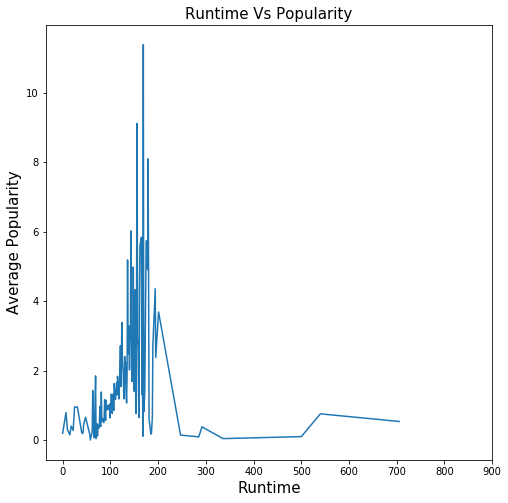

In [25]:
#i made this group of  data according to their runtime and the mean popularity, then plotting them.
df.groupby('runtime')['popularity'].mean().plot(figsize = (8,8),xticks=np.arange(0,1000,100))
plt.title("Runtime Vs Popularity",fontsize = 15) #setting title of figure
plt.xlabel('Runtime',fontsize = 15) #labeling x
plt.ylabel('Average Popularity',fontsize = 15) #labeling y


As we can see in the above plot, movies that ranged from 100 to 200 runtime had higher popularity

<a id='conclusions'></a>
## Conclusions     
1-Movies with higher budget had more profit due to posititve correlationn 
2-Drama had the highest number of movies through the years    
3-2011 had the highest number of movies, and 1961 had the lowest    
4-The movie with higher popularity clearly had more profit       
5-Movies that had a small runtime between 100 and 200 had higher popularity

## Limitations

-The data provided had a lot of NAN values which may affect the accuracy of the analysis    
-the genres coloumn had a ('|') between values so i had to split which took more time calculating

## Refrences  
i used kaggle as back source to he

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0